# Mortality rates

This data have been collected from https://www.statista.com/statistics/1106372/coronavirus-death-rate-by-age-group-italy/ and reflects the mortality rate situation as in November 14th 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

lst = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '>90'] 
  
# list of int 
lst2 = [0,0,0,0.1, 0.3, 0.9, 4.4, 14.3, 23.8,26.5] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(lst, lst2)), 
               columns =['Age Range', 'Rate']).set_index('Age Range')
df 

,Rate
Age Range,
0-9,0.0
10-19,0.0
20-29,0.0
30-39,0.1
40-49,0.3
50-59,0.9
60-69,4.4
70-79,14.3
80-89,23.8


Text(0.5, 1.0, 'COVID-19 Mortality Rate by Age')

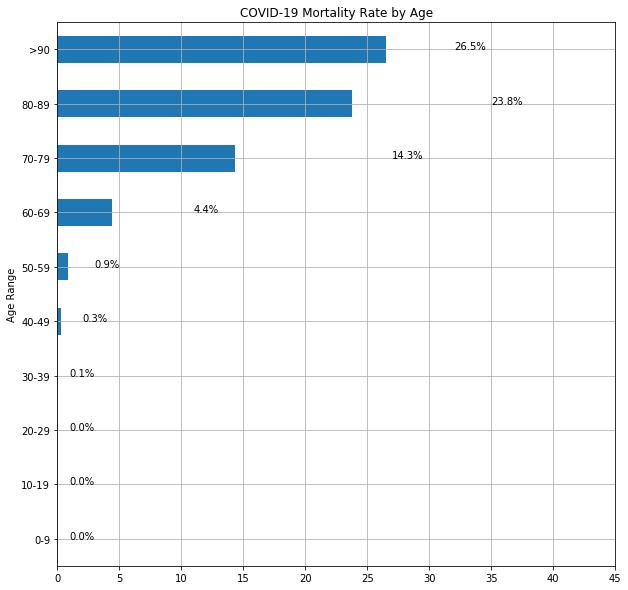

In [2]:
#making bar chart

ax=df.Rate.plot(kind='barh', xlim=(0,45), figsize=(10,10), grid=True)


ax.text(1, 0, str(str(df.Rate[0])+'%'), fontsize=10)
ax.text(1, 1, str(str(df.Rate[1])+'%'), fontsize=10)
ax.text(1, 2, str(str(df.Rate[2])+'%'), fontsize=10)
ax.text(1, 3, str(str(df.Rate[3])+'%'), fontsize=10)
ax.text(2, 4, str(str(df.Rate[4])+'%'), fontsize=10)
ax.text(3, 5, str(str(df.Rate[5])+'%'), fontsize=10)
ax.text(11, 6, str(str(df.Rate[6])+'%'), fontsize=10)
ax.text(27, 7, str(str(df.Rate[7])+'%'), fontsize=10)
ax.text(35, 8, str(str(df.Rate[8])+'%'), fontsize=10)
ax.text(32, 9, str(str(df.Rate[9])+'%'), fontsize=10)

ax.set_title('COVID-19 Mortality Rate by Age')


# Stratified sampling

In [3]:
import pickle
import pandas as pd
#df.to_pickle('df.pkl')
df = pd.read_pickle('df.pkl')
df

,Age,Gender,Disease,Safety,Beloved_sick,Economic_impact,Individual_risk,Exposed_environment,Easily_influenced,Avg_contacts,Beloved_care,Hypocondriac,risk
0,22,1,0,0,0,0,1,0,1,4,0,0,1
1,23,1,0,0,0,0,0,0,1,4,0,0,0
2,86,0,1,0,1,0,1,0,0,1,1,0,1
3,27,1,0,1,0,0,0,0,1,3,1,0,1
4,45,1,0,0,0,0,1,0,1,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,66,1,0,1,0,0,0,1,0,1,1,1,1
98,28,0,0,1,1,0,0,1,0,5,0,0,0
99,50,0,0,1,0,0,0,0,0,3,1,0,1
100,19,1,0,1,0,0,0,0,1,2,0,0,0


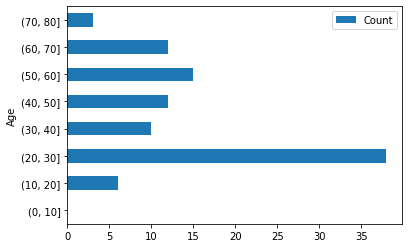

In [4]:
import numpy as np
df.groupby(pd.cut(df["Age"], np.arange(0, df.Age.max(), 10))).count()[['Age']].rename(columns = {'Age': 'Count'}).plot(kind='barh')